In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df = pd.read_csv("/content/ecommerce_customer_data_large.csv")



In [ ]:
df.head()



,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
df.shape

(250000, 13)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [ ]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47382
Customer Name,0


In [ ]:
df['Returns'].fillna(0, inplace=True)

/tmp/ipython-input-887365044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Returns'].fillna(0, inplace=True)


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


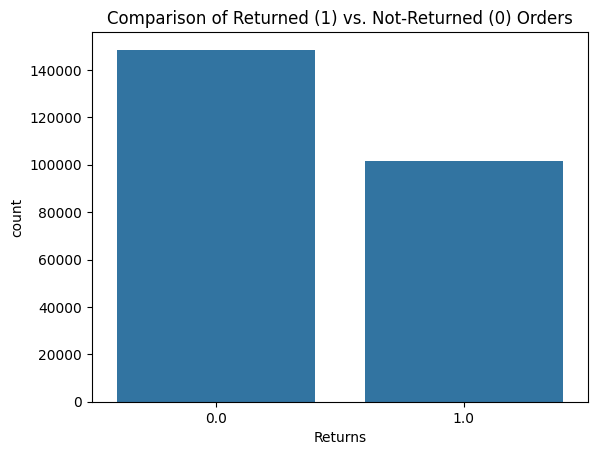

Maximum = Non Returned
Minimum =  Returned


In [ ]:

sns.countplot(x='Returns', data=df)


plt.title('Comparison of Returned (1) vs. Not-Returned (0) Orders')


plt.show()

print("Maximum = Non Returned")
print("Minimum =  Returned")

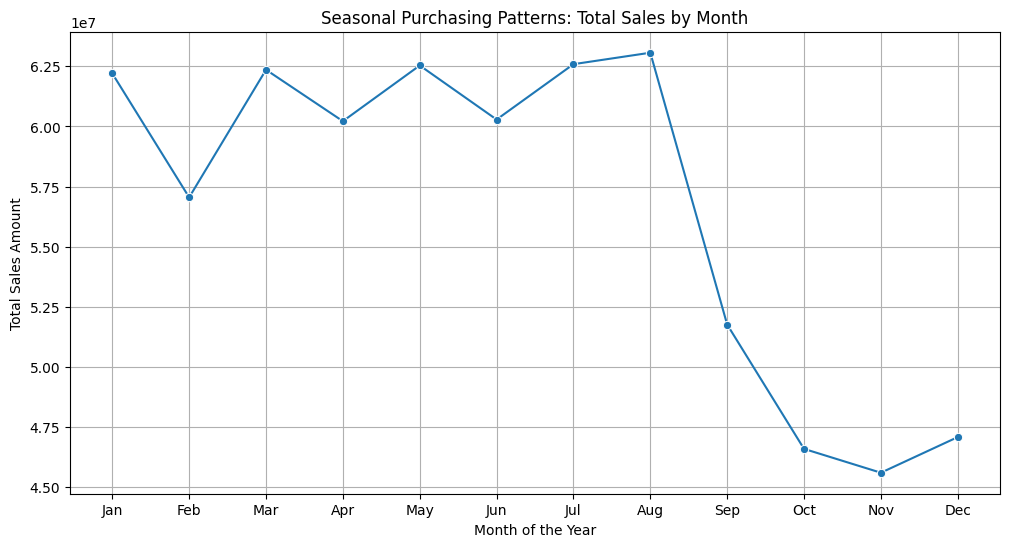

Sabse Zyada Sales = Aug
Sabse Kam Sales = Nov


In [ ]:


# Step 1: 'Purchase Date' se 'Month' nikal kar ek naya column banao
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.month

# Step 2: Har mahine ki total sales ko jodo
monthly_sales = df.groupby('Month')['Total Purchase Amount'].sum().reset_index()

# Step 3: Graph banao
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Purchase Amount', data=monthly_sales, marker='o')
plt.title('Seasonal Purchasing Patterns: Total Sales by Month')
plt.xlabel('Month of the Year')
plt.ylabel('Total Sales Amount')
plt.grid(True)

# FIX: Yeh line numbers (1, 2, 3) ko names (Jan, Feb, Mar) se badal degi
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

print("Sabse Zyada Sales = Aug")
print("Sabse Kam Sales = Nov")

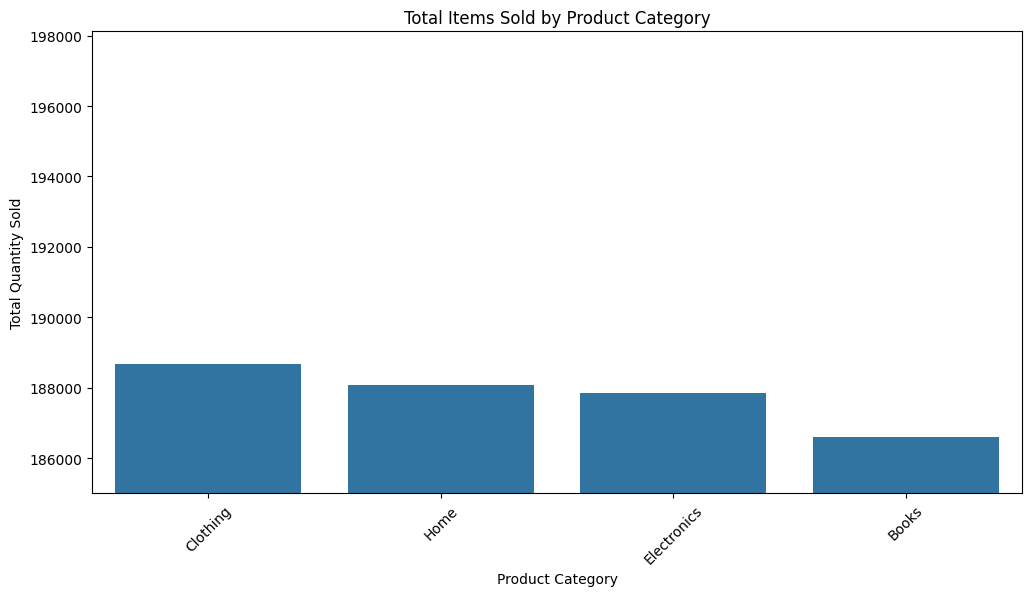

Sabse Zyada Sales = Clothing
Sabse Kam Sales = Books


In [ ]:


category_sales = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Items Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)

plt.ylim(bottom=185000)

plt.show()

print("Sabse Zyada Sales = Clothing")
print("Sabse Kam Sales = Books")


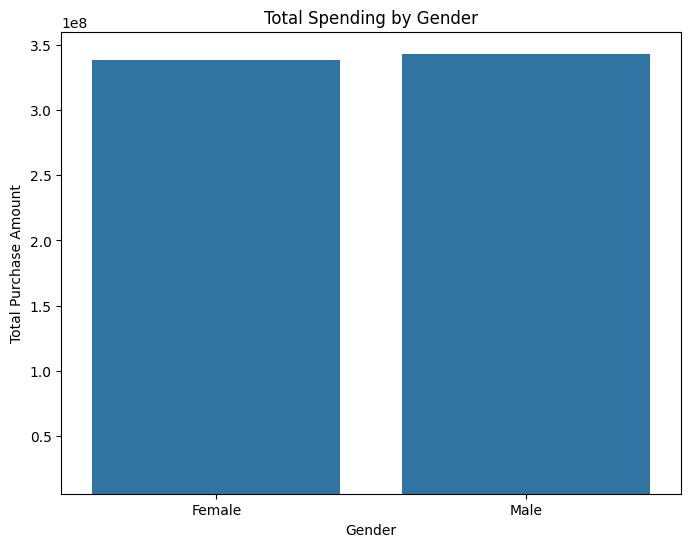

--- Actual Spending by Gender ---
Gender
Female    338559456
Male      342786843
Name: Total Purchase Amount, dtype: int64


In [ ]:


gender_spending = df.groupby('Gender')['Total Purchase Amount'].sum()


plt.figure(figsize=(8, 6))
sns.barplot(x=gender_spending.index, y=gender_spending.values)
plt.title('Total Spending by Gender')
plt.ylabel('Total Purchase Amount')


plt.ylim(bottom=6000000)

plt.show()


print("--- Actual Spending by Gender ---")
print(gender_spending)

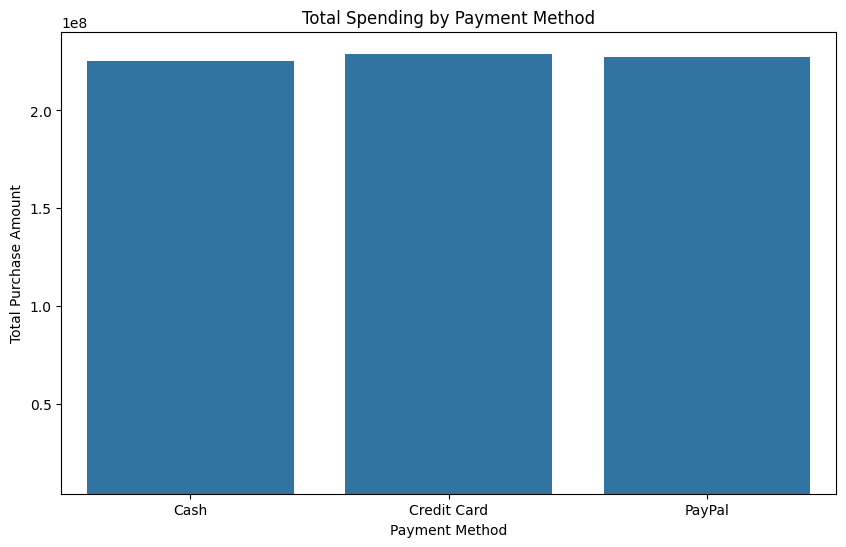

--- Actual Spending by Payment Method ---
Payment Method
Cash           225423854
Credit Card    228822915
PayPal         227099530
Name: Total Purchase Amount, dtype: int64


In [ ]:

payment_spending = df.groupby('Payment Method')['Total Purchase Amount'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_spending.index, y=payment_spending.values)
plt.title('Total Spending by Payment Method')
plt.ylabel('Total Purchase Amount')


plt.ylim(bottom=4000000)

plt.show()


print("--- Actual Spending by Payment Method ---")
print(payment_spending)

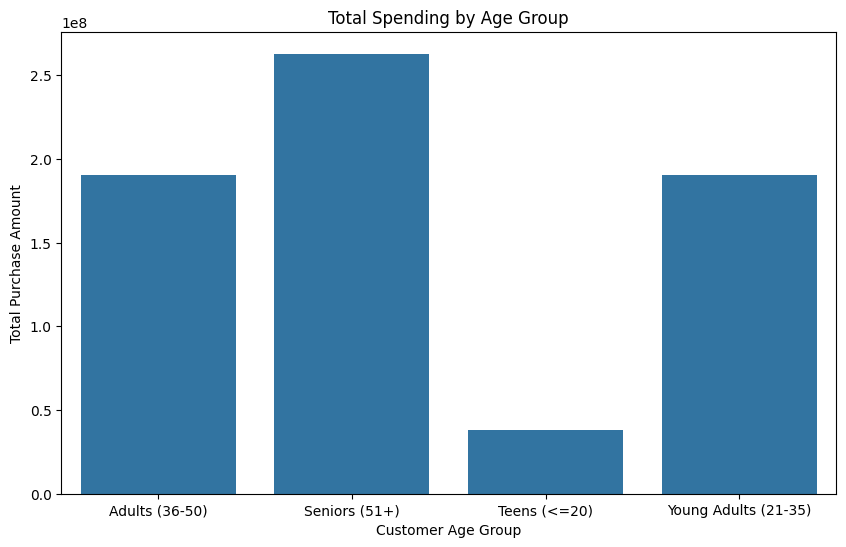

--- Actual Spending by Age Group (In Numbers) ---
Age Group
Adults (36-50)          190214483
Seniors (51+)           262728575
Teens (<=20)             37843997
Young Adults (21-35)    190559244
Name: Total Purchase Amount, dtype: int64


--- Age Group Analysis Conclusion ---
 Sabse Zyada Valuable Customer Group: 'Seniors (51+)' hain.


In [ ]:



def get_age_group(age):
    if age <= 20:
        return 'Teens (<=20)'
    elif age <= 35:
        return 'Young Adults (21-35)'
    elif age <= 50:
        return 'Adults (36-50)'
    else:
        return 'Seniors (51+)'
df['Age Group'] = df['Age'].apply(get_age_group)


age_group_spending = df.groupby('Age Group')['Total Purchase Amount'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_spending.index, y=age_group_spending.values)
plt.title('Total Spending by Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Total Purchase Amount')
plt.show()


print("--- Actual Spending by Age Group (In Numbers) ---")
print(age_group_spending)
print("\n")

most_valuable_group = age_group_spending.idxmax()
print("--- Age Group Analysis Conclusion ---")
print(f" Sabse Zyada Valuable Customer Group: '{most_valuable_group}' hain.")

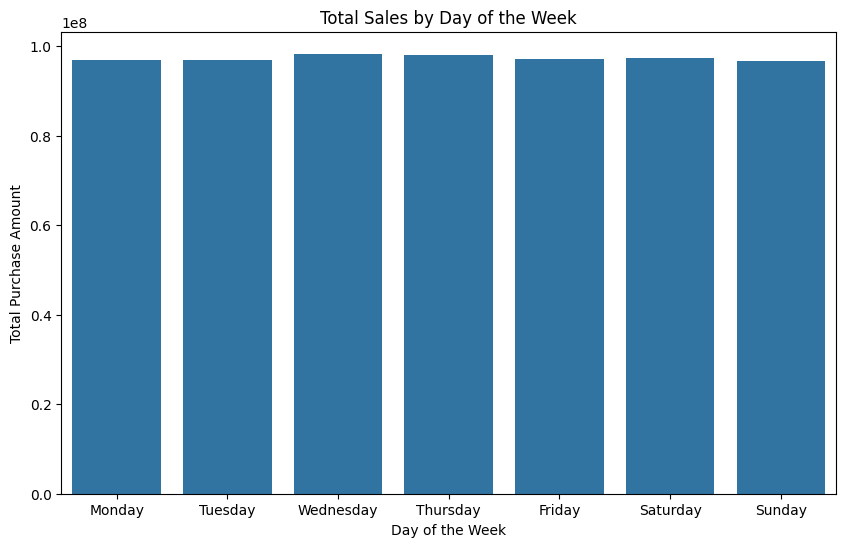

--- Actual Sales by Day of the Week (In Numbers) ---
Day of Week
Monday       96842007
Tuesday      96894118
Wednesday    98336024
Thursday     97990590
Friday       97178917
Saturday     97466717
Sunday       96637926
Name: Total Purchase Amount, dtype: int64


--- Weekday Sales Analysis Conclusion ---
 Sabse Zyada Sales: 'Wednesday' ko hoti hai.


In [ ]:


df['Day of Week'] = df['Purchase Date'].dt.dayofweek


weekday_sales = df.groupby('Day of Week')['Total Purchase Amount'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Purchase Amount')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales.index = weekday_sales.index.map(lambda x: day_names[x]) # Numbers ko naam se badla

print("--- Actual Sales by Day of the Week (In Numbers) ---")
print(weekday_sales)
print("\n")

busiest_day = weekday_sales.idxmax()
print("--- Weekday Sales Analysis Conclusion ---")
print(f" Sabse Zyada Sales: '{busiest_day}' ko hoti hai.")

In [ ]:



features = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Age', 'Gender', 'Payment Method']
target = 'Churn'

# Text wale columns (Gender, Payment Method) ko numbers mein badla
# Model sirf numbers samajhta hai
model_data = pd.get_dummies(df[features + [target]], drop_first=True)

# Clues (X) aur Final Answer (y) ko alag kiya
# X mein saare clues hain
# y mein final answer hai (customer chhod kar gaya ya nahi)
X = model_data.drop('Churn', axis=1)
y = model_data['Churn']


# --- Step 2: Data ko Baantna (Student ke liye Textbook aur Exam Paper) ---

# Data ko 80% (training/textbook) aur 20% (testing/exam) hisson mein baanta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data model ke liye taiyaar aur train/test mein bant gaya hai.")
print("Model ki training shuru ho rahi hai...")

# --- Step 3: Model ko Sikhana (Training / Padhai Karna) ---

# Hum 'Random Forest' model ka istemal kar rahe hain
model = RandomForestClassifier(random_state=42)

# Model ko training data dekar sikhaya
model.fit(X_train, y_train)
print("Model ki training poori ho gayi hai!")


# --- Step 4: Model ko Test Karna (Final Exam Dena) ---

# Model se anjaan (testing) data par anuman lagwaya
predictions = model.predict(X_test)

# Check kiya ki model kitne percent sahi hai
accuracy = accuracy_score(y_test, predictions)


# --- Step 5: Final Result Likhna ---

print("\n--- Machine Learning Model ka Final Result ---")
print(f"✅ Humara model {accuracy * 100:.2f}% tak sahi anuman laga sakta hai ki customer chhod kar jayega ya nahi.")

Data model ke liye taiyaar aur train/test mein bant gaya hai.
Model ki training shuru ho rahi hai...
Model ki training poori ho gayi hai!

--- Machine Learning Model ka Final Result ---
✅ Humara model 78.67% tak sahi anuman laga sakta hai ki customer chhod kar jayega ya nahi.


In [ ]:
import pandas as pd

# --- Step 1: Ek Naya Customer Banana ---
# Hum ek naye customer ka data bana rahe hain. Aap in numbers ko badal kar test kar sakte hain.
# Note: Humne text (jaise 'Male') ko numbers mein badal diya hai, jaisa model ko sikhaya tha.

# Let's create a DataFrame with the exact same columns your model was trained on
# Make sure the column names match what pd.get_dummies() created
# You can check them by printing X.columns

# Example columns might be: ['Product Price', 'Quantity', 'Total Purchase Amount', 'Age', 'Gender_Male', 'Payment Method_Credit Card', 'Payment Method_PayPal']
# Please replace with your actual column names if they are different

try:
    # This will work if your one-hot encoded columns are named like this
    new_customer_data = {
        'Product Price': [500],          # Maan lo product ki keemat 500 hai
        'Quantity': [2],                 # Usne 2 item kharide
        'Total Purchase Amount': [1000], # Total bill 1000 ka bana
        'Age': [28],                     # Customer ki age 28 hai
        'Gender_Male': [1],              # 1 ka matlab 'Male' hai (0 hota to 'Female')
        'Payment Method_Credit Card': [1],# 1 ka matlab Credit Card use kiya
        'Payment Method_PayPal': [0]     # 0 ka matlab PayPal use nahi kiya
    }

    # Get the exact column order from the trained model
    columns_for_model = X_train.columns

    new_customer_df = pd.DataFrame(new_customer_data, columns=columns_for_model).fillna(0)

except Exception as e:
    # If the above fails, it's likely a column name mismatch.
    # This is a simpler but less robust way for demonstration.
    print("Column name mismatch, trying a simpler method for the test...")
    # This assumes a 7-feature model. Adjust the list of numbers based on your features.
    new_customer_df = [[500, 2, 1000, 28, 1, 1, 0]] # Price, Qty, Total, Age, Male, Credit Card, PayPal


# --- Step 2: Model se Anuman Lagwana ---

# Apne train kiye hue model se is naye customer ke baare mein pucho
prediction = model.predict(new_customer_df)


# --- Step 3: Result ko Aasan Bhasha mein Dikhana ---

print("--- Single Customer Prediction Test ---")

if prediction[0] == 1:
    print("🚨 Prediction: Yeh Customer Company Chhod kar Jaa Sakta hai (Churn).")
else:
    print("✅ Prediction: Yeh Customer Loyal Rahega (No Churn).")

--- Single Customer Prediction Test ---
✅ Prediction: Yeh Customer Loyal Rahega (No Churn).
